This project will focus on analysis of where crimes happen in Chicago and how they are affected by various factors. The client(s) can include law<br> enforcement, the government, or the residents of Chicago. <br>
<br>It's important to know the pattern of crimes in the city and how they are affected by other factors. For law enforcement, they would be able to allocate <br>
their limited resources more effectively by sending officers to where they are likely needed the most. While crime pattern analysis is useful, the factors <br>
that contribute/affect where and what kind of crimes happen are important as well. These factors can include but not limited to: weather, income level, <br>
time of the day, public transit, poverty levels, unemployment, school closings, and demographics. If there is a correlation between crimes and one or <br>
more of these factors, actions can be taken to mitigate the situation if possible. With regards to local residents, the analysis can be useful for them <br>
to avoid certain areas during a certain time period especially when public transit stops are invovled. <br>
<br>Various data files will be used to help aid the analysis including the main crime data set from city of Chicago data portal. This data set contains <br>
<b><a href="https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2">crime data</a></b> collected over the course of 16
years between 2001 and 2016 and can be downloaded as a single csv file. The <b><a href="https://www.ncdc.noaa.gov/cdo-web/">weather data</a></b><br>is collected from NOAA website also between 2001 and 2016. The data is split into two halves because NOAA only allows a certain amount <br> information to be downloaded at a time. The file has daily summaries where things like temperature, precipitation, snow, date and coordinates are included.<br> To explore other factors, I also downloaded the following data sets to aid the analysis: <br>
<b>School closing data</b> from: <a href="https://wbez-assets.s3.amazonaws.com/WBEZ-Graphics/SchoolChart.html"> school closing data </a> <br>
<b>Unemployment data</b> from: <a href="http://www.ides.illinois.gov/LMI/Pages/Historical_Monthly_Annual_Data.aspx"> unemployment data </a><br>
<b>Chicago L transit stops</b> from: <a href="https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops/8pix-ypme"> L stops data </a><br>
Census data from 2010 census from US Census Buerau and they include: <br>
<b>Education, income, poverty levels, and race</b> data broken down by community in Chicago. They are downloaded from the following link: <a href="http://robparal.blogspot.com/2012/05/hard-to-find-census-data-on-chicago.html?m=1"> Chicago census data </a> <br>
These data files are collected either as csv files or plain html text. The html text is converted to csv in Excel. With all the data files collected, I can then <br>
begin my data cleaning and analysis in the following sections.

<h3>Data merging, cleaning and wrangling</h3>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps                                #used for plotting data on google maps using an API
import gmaps.datasets
import os

#Since there are two weather data files, I first merged them into 1 file
weather1=pd.read_csv('data/Crime/weather1.csv')
weather2=pd.read_csv('data/Crime/weather2.csv')
#Check to see if they have the same shape
print(weather1.shape, weather2.shape)

(3652, 34) (2515, 30)


In [2]:
#Looks like the second file has less columns. Let's take a look at both files and see what we can drop
pd.set_option('max_columns', 60)
weather1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03,WV20
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,15.0,24,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,18.0,28,7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,25.0,30,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,29.0,36,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-01,0.0,0.0,0.0,NaN,41.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-02,0.0,0.0,0.0,NaN,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-03,0.0,0.0,0.0,NaN,36.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-04,0.0,0.0,0.0,NaN,30.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-05,0.0,0.0,0.0,NaN,31.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


The WT columns are weather types and they are denoted by numbers from 01 to 19 and 21 and 22 (in the column names). Each is a difference weather <br>
type. The WV is weather in the vicinity. It can have five values: 01, 03, 07, 18 and 20. In those columns, 1.0 means that's the weather type of that day and <br>
nan means not that weather type. We can consolidate all those WT columns into one column 'weather type' and assign a value to represent the weather <br>
type of that day according to the number in its column names. A dictionary can be constructed to map the value to a weather type as a string. We will drop <br>
the WV columns as they are irrelavant for the analysis.

In [4]:
#Contruct a dictionary to map WT values to actual weather types according to NOAA documentation
weather_type={'WT01': 'Fog, ice fog, or freezing fog', 'WT02': 'Heavy fog or freezing fog', 'WT03': 'Thunder', 'WT04': 'Ice pellets, sleet, snow pellets, or small hail',
                            'WT05': 'Hail', 'WT06': 'Glaze or rime', 'WT07': 'Dust, blowing dust, or blowing obstruction', 'WT08': 'Smoke or haze', 
                            'WT09': 'Blowing or drifting snow',  'WT10': 'Tornado, waterspout, or funnel cloud', 'WT11': 'High or damaging winds', 'WT12': 'Blowing spray', 
                            'WT13': 'Mist', 'WT14': 'Drizzle', 'WT15': 'Freezing drizzle', 'WT16': 'Rain', 'WT17': 'Freezing rain', 
                            'WT18': 'Snow, snow pellets, snow grains, or ice crystals', 'WT19': 'Unknown source of precipitation', 
                            'WT20': 'Rain or snow shower', 'WT21': 'Ground fog', 'WT22': 'Ice fog or freezing fog'}

#First drop WV columns and then slice the WT columns into a new data frame
weather1.drop(['WV03', 'WV20'], axis=1, inplace=True)
weather1_wt=weather1.iloc[:, 13:34]
weather2_wt=weather2.iloc[:,12:30 ]

#Write a function to return a list with all weather types
def extract_weather_type(weather_types):
    """This function take a data frame as an argument and returns all weather types for each row in a list"""    
    weather_type_list=[]
    for i in range(len(weather_types)):
        type_per_row=[]
        for k, n in enumerate(weather_types.columns):
            if weather_types.iloc[i, k]==1.0:
                type_per_row.append(n)
        if len(type_per_row)==0:
            weather_type_list.append('Unknown')
        else:
            weather_type_list.append([weather_type[x] for x in type_per_row])
    return(weather_type_list)

#Now convert all the weather types of the two weather data sets into one single list
weather_list1=extract_weather_type(weather1_wt)
weather_list2=extract_weather_type(weather2_wt)

#Now drop all WT columns in original data sets and then add a new column named "weather_type"
weather1.drop(weather1_wt.columns, axis=1, inplace=True)
weather2.drop(weather2_wt.columns, axis=1, inplace=True)

#Add a new column to each data frame
weather1['weather_type']=weather_list1
weather2['weather_type']=weather_list2

#Drop TSUN (total sunshine) column of the first data frame since it's not present in data frame 2.
weather1.drop('TSUN', axis=1, inplace=True)

#Now the two data frame should contain the same columns, we can combine them into 1 data frame
weather=weather1.append(weather2)
weather.reset_index(inplace=True)
weather.head()

,index,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
0,0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,15.0,24.0,5.0,Unknown
1,1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown
2,2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,18.0,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn..."
3,3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,25.0,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,..."
4,4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,29.0,36.0,21.0,[Smoke or haze]


In [5]:
#Check the new data frame
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6166 non-null float64
SNOW            6165 non-null float64
SNWD            6134 non-null float64
TAVG            3365 non-null float64
TMAX            6166 non-null float64
TMIN            6166 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


Looks good but the TAVG has some null values. Since TAVG=(TMAX+TMIN)/2, we can recalculate all the average temperatures and recontruct the column

In [6]:
t_ave=(weather.TMAX+weather.TMIN)/2
weather['TAVG']=t_ave
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6166 non-null float64
SNOW            6165 non-null float64
SNWD            6134 non-null float64
TAVG            6166 non-null float64
TMAX            6166 non-null float64
TMIN            6166 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


The 'PRCP' column has 1 null value, the 'SNOW' column has 2 null values, the 'SNWD' column has 33 null values, and all the temperature columns have <br>
1 null value. For precipitation values we will fill with 0 but for temperatures we will fill these missing values with forward fill.

In [7]:
weather.loc[:, 'PRCP':'SNWD']=weather.loc[:, 'PRCP':'SNWD'].fillna(value=0)
weather.loc[:, 'TAVG': 'TMIN']=weather.loc[:, 'TAVG': 'TMIN'].fillna(method='ffill')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6167 non-null float64
SNOW            6167 non-null float64
SNWD            6167 non-null float64
TAVG            6167 non-null float64
TMAX            6167 non-null float64
TMIN            6167 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


Now we have a complete weather data frame to work with. Since all the stations and names are the same, we can discard those two columns as well

In [8]:
weather.drop(['STATION', 'NAME'], axis=1, inplace=True)

Next, let's convert the 'DATE' column to a datetime object and we can then use it to merge to the crime data set

In [23]:
weather['DATE']=pd.to_datetime(weather['DATE'])
weather['date']=weather['DATE'].astype(str)
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 13 columns):
index           6167 non-null int64
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null datetime64[ns]
PRCP            6167 non-null float64
SNOW            6167 non-null float64
SNWD            6167 non-null float64
TAVG            6167 non-null float64
TMAX            6167 non-null float64
TMIN            6167 non-null float64
weather_type    6167 non-null object
date            6167 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 626.4+ KB


,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type,date
0,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown,2001-01-01
1,1,41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown,2001-01-02
2,2,41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,17.5,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn...",2001-01-03
3,3,41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,24.5,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,...",2001-01-04
4,4,41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,28.5,36.0,21.0,[Smoke or haze],2001-01-05


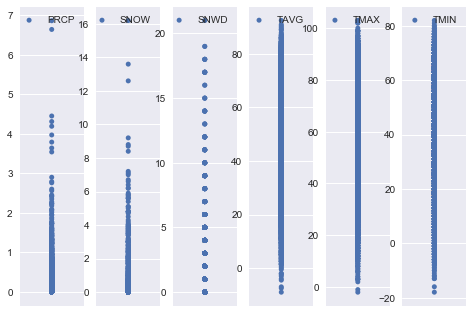

In [11]:
#Check to see how the numerica data look
for k,n in enumerate(['PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']):
    plt.subplot(1,6, k+1)
    sns.stripplot(weather[n].values, orient='v', label=n)
    plt.legend(loc='upper right')
plt.show()

Now we are going to import the crime data. This is a farily large data set and after we import it and clean it, we can break it down by years. We first load <br>
1000 rows to check the data.

In [12]:
crime_1k=pd.read_csv('data/crime/crimes_chi.csv', nrows=1000)
crime_1k.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,01/31/2006 12:13:05 PM,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,2432,24,40,1,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,03/21/2006 07:00:00 PM,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,825,8,15,66,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,02/09/2006 01:44:41 AM,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,711,7,20,68,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"
3,4647373,HM244805,03/21/2006 04:45:00 PM,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1121,11,26,23,06,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
4,4647374,HM245851,03/21/2006 10:00:00 PM,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,631,6,8,44,06,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"


We need to convert the date to a timestamp for easy manipulation and also merging with weather data. Since the file is large, we will process by chunks <br>
and then concatenate all the chunks to one data frame

In [13]:
crime_data_list=[]
with open('data/crime/crimes_chi.csv') as file:
    for chunk in pd.read_csv('data/crime/crimes_chi.csv', chunksize=1000000):
        chunk['Date']=pd.to_datetime(chunk['Date'], format='%m/%d/%Y %I:%M:%S %p')
        crime_data_list.append(chunk)
crimes=pd.concat(crime_data_list)

Let's check this data set and see if there are missing values or outliers.

In [14]:
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6478356 entries, 0 to 6478355
Data columns (total 22 columns):
ID                      6478356 non-null int64
Case Number             6478352 non-null object
Date                    6478356 non-null datetime64[ns]
Block                   6478356 non-null object
IUCR                    6478356 non-null object
Primary Type            6478356 non-null object
Description             6478356 non-null object
Location Description    6475409 non-null object
Arrest                  6478356 non-null bool
Domestic                6478356 non-null bool
Beat                    6478356 non-null int64
District                6478307 non-null float64
Ward                    5863502 non-null float64
Community Area          5862326 non-null float64
FBI Code                6478356 non-null object
X Coordinate            6391699 non-null float64
Y Coordinate            6391699 non-null float64
Year                    6478356 non-null int64
Updated On       

In [15]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,2006-01-31 12:13:05,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,2432,24.0,40.0,1.0,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,2006-03-21 19:00:00,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,825,8.0,15.0,66.0,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,2006-02-09 01:44:41,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,711,7.0,20.0,68.0,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"
3,4647373,HM244805,2006-03-21 16:45:00,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1121,11.0,26.0,23.0,06,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
4,4647374,HM245851,2006-03-21 22:00:00,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,631,6.0,8.0,44.0,06,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"


For visualizing the crimes on google maps, we don't need the 'Ward' or 'Community' information. We only need latitude and longitude information. So <br>
we can drop those two columns first.

In [16]:
crimes.drop(['Ward', 'Community Area'], axis=1, inplace=True)

We can then drop all null rows especially when latitude and longitude information is missing

In [17]:
crimes.dropna(inplace=True)

In [18]:
#Check to see if the data frame now does not have any missing values
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6389608 entries, 0 to 6478355
Data columns (total 20 columns):
ID                      6389608 non-null int64
Case Number             6389608 non-null object
Date                    6389608 non-null datetime64[ns]
Block                   6389608 non-null object
IUCR                    6389608 non-null object
Primary Type            6389608 non-null object
Description             6389608 non-null object
Location Description    6389608 non-null object
Arrest                  6389608 non-null bool
Domestic                6389608 non-null bool
Beat                    6389608 non-null int64
District                6389608 non-null float64
FBI Code                6389608 non-null object
X Coordinate            6389608 non-null float64
Y Coordinate            6389608 non-null float64
Year                    6389608 non-null int64
Updated On              6389608 non-null object
Latitude                6389608 non-null float64
Longitude         

In [19]:
crimes.index=crimes['Date']
crimes.sort_index(inplace=True)

Now I am going to merge with the weather data to use for further analysis

In [24]:
#First create a date columns to link to weather data
crimes['date']=crimes['Date'].dt.date
crimes['date']=crimes['date'].astype(str)
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01
2001-01-01,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01
2001-01-01,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01
2001-01-01,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01
2001-01-01,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01


Now the 'date' column can be used to merge with weather data

In [22]:
weather.head()

,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
0,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
1,1,41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown
2,2,41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,17.5,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn..."
3,3,41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,24.5,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,..."
4,4,41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,28.5,36.0,21.0,[Smoke or haze]


In [25]:
pd.merge(crimes, weather, on='date', how='left').head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
0,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
1,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
3,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
4,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown


In [26]:
#merge the two data frames into one new data frame for analysis
crimes_wea=pd.merge(crimes, weather, on='date', how='left')
crimes_wea.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
6389603,11147510,JA509544,2017-11-12 23:30:00,057XX W LAKE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,1512,15.0,08B,1138028.0,1902221.0,2017,11/19/2017 03:51:13 PM,41.887829,-87.768575,"(41.887829366, -87.768575322)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389604,11149104,JA511655,2017-11-12 23:30:00,022XX W CHARLESTON ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1432,14.0,06,1161186.0,1914084.0,2017,11/19/2017 03:51:13 PM,41.919933,-87.683201,"(41.919932633, -87.683201087)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389605,11147551,JA509596,2017-11-12 23:30:00,047XX N ASHLAND AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,1912,19.0,05,1164804.0,1931504.0,2017,11/19/2017 03:51:13 PM,41.967658,-87.669412,"(41.967657963, -87.669412246)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389606,11147517,JA509554,2017-11-12 23:32:00,081XX S CORNELL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,411,4.0,14,1188677.0,1851516.0,2017,11/19/2017 03:51:13 PM,41.747626,-87.584201,"(41.747626436, -87.584200954)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389607,11147527,JA509559,2017-11-12 23:45:00,118XX S MORGAN ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,524,5.0,08A,1171790.0,1826339.0,2017,11/19/2017 03:51:13 PM,41.678924,-87.646815,"(41.678923809, -87.646815265)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."


We can then save the new data frame as a csv file for future analysis. In the following sections, I will use other data sets and this new data with weather <br>
information to do some exploratory analysis

In [27]:
#Write to a CSV file for following processing
crimes_wea.to_csv('data/crime/crimes_weather.csv')